#Linear Algebra

In [187]:
#Libs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

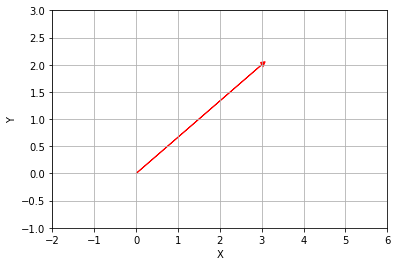

In [188]:
plt.arrow(0,0,3,2,head_length=0.1,head_width=0.1,color='r')
plt.grid()
plt.xlim(-2,6)
plt.ylim(-1,3)
plt.xlabel('X')
plt.ylabel('Y');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [189]:
#The norm of a vector represents its (positive) length or size
np.linalg.norm(np.array([17,-4,-2,1]))

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [190]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)

42

The two vectors ($\vec{c} \cdot \vec{d}$) are NOT orthogonal as their dot product does NOT equal zero. 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [191]:
e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
e_inv = np.linalg.inv(e)
e_t = e.T

$E^{-1}$

In [192]:
e_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

$E^{T}$

In [193]:
e_t

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [194]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [195]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [196]:
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Variance is the measure of how dispersed a dataset is (how far the data is spread out from their mean). These are not comparable when you take the features (context) into consideration (the number of customers present at the ski resort has nothing to do with the inches of snow reported and would be misleading). Observationally, their variances are quite different though. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [197]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [198]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [199]:
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [200]:
#Make a copy of the DF
df_copy = df.copy()

In [201]:
df_copy.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [202]:
#Drop categorical features
df_copy = df_copy.drop(columns='Country')

In [203]:
#Standardize the data (mean=0 / stdv=~1)
df_copy = preprocessing.scale(df_copy)
df_copy = pd.DataFrame(df_copy)

/Users/dwightchurchill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [204]:
#Validate mean and stdv
df_copy.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [205]:
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(df_copy)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(df_copy)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]]

 Eigenvalues: 
 [15.48765084  5.63749203]

 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


In [206]:
#Create DF of projected data
pro_df = pd.DataFrame(B)
pro_df.head()

,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


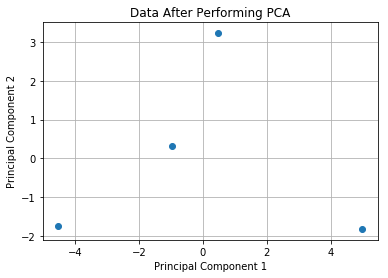

In [207]:
plt.scatter(pro_df[0],pro_df[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After Performing PCA')
plt.grid()
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [208]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [307]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    #For each [k] in our specified range, call KMeans with the number of clusters to form + centroids to generate + fit data
    km = KMeans(n_clusters=k).fit(points)
    #append 'sum of squared distances of samples to their closest cluster center' to our list
    sum_of_squared_distances.append(km.inertia_)

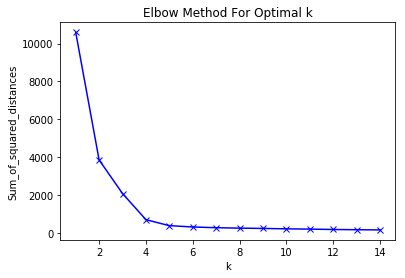

In [308]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [309]:
#4 clusters looks correct to me, given it's curve depicted

#Create our labels + coordinates of cluster centers
kmeans = KMeans(n_clusters=4).fit(points)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [310]:
print('\n',labels)
print('\n',centers)
print('\n',centers[:,0])
print('\n',centers[:,1])


 [0 2 2 0 2 2 0 0 3 2 2 2 2 2 0 2 0 2 2 1 0 1 1 1 2 2 2 3 2 2 2 2 2 1 2 2 2
 2 3 2 2 1 3 3 3 2 2 2 0 2 1 0 0 3 1 2 2 3 3 0 1 2 0 3 1 3 1 3 0 3 2 2 2 2
 1 1 2 2 3 1 3 2 2 2 3 2 3 2 2 1 3 2 1 2 2 2 2 2 2 2 2 2 0 2 2 1 0 0 0 1 2
 1 2 0 2 2 3 3 1 3 1 2 2 0 2 0 2 1 3 0 2 0 2 0 3 3 2 1 0 2 3 2 2 1 2 3 2 3
 0 2 2 2 0 1 2 3 2 1 2 0 2 2 3 0 1 1 2 3 2 2 0 2 3 1 2 2 2 2 2 0 2 2 2 2 2
 2 0 1 3 2 2 0 1 0 2 3 1 1 2 2]

 [[-8.36652987e+00 -3.61238083e+00  3.00000000e+00]
 [ 6.24979318e+00  3.84457183e+00  1.00000000e+00]
 [-2.73359305e+00 -8.20435304e+00  1.44328993e-15]
 [-3.59740679e+00  4.13344099e+00  2.00000000e+00]]

 [-8.36652987  6.24979318 -2.73359305 -3.59740679]

 [-3.61238083  3.84457183 -8.20435304  4.13344099]


In [311]:
#Add labels to the points DF
new_s = pd.Series(labels)
points['Labels'] = new_s.values
points.head(10)

,x,y,Labels
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,2
2,-0.192822,-9.671030,2
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,2
5,-4.977194,-6.138836,2
6,-8.118990,-3.624109,0
7,-8.145629,-2.787951,0
8,-3.568659,5.401781,3
9,-5.711709,-6.802013,2


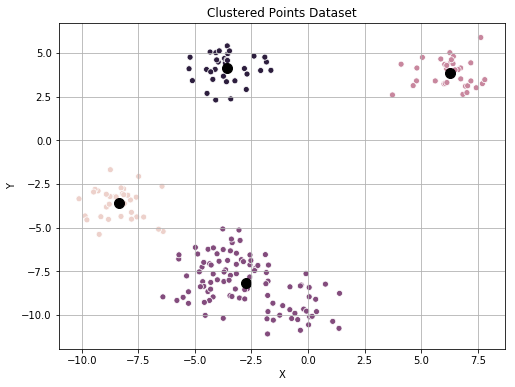

In [313]:
fig = plt.figure(111,figsize=(8,6))
ax = fig.add_subplot()
sns.scatterplot(points['x'],points['y'],points['Labels'],legend=None)
plt.scatter(centers[:,0],centers[:,1].T,c='black',s=100)

plt.grid()
plt.title('Clustered Points Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()